# Family of univariate normal distributions

* The family of univariate normal distributions is defined through the shifts and rescalings of the standard normal distibution. 
* In the following we explore how resulting density functions are related to the shift and scale parameters.  

In [1]:
import numpy as np
from pandas import DataFrame
from scipy.stats import norm
from plotnine import *

## I. Standard normal distribution 

The probability density function of the standard normal distribution $\mathcal{N}(0,1)$ is given by the formula

\begin{align*}
p(x)=\frac{1}{\sqrt{2\pi}}\cdot\exp\left(-\frac{x^2}{2}\right)\enspace.
\end{align*}


The corresponding visualisation of the probability density function  visualisation is given below.
* The mean $\mu$ of the distribution is depicted by the vertical blue line. 
* The interval of single standard deviation $[\mu-\sigma, \mu+\sigma]$ is depicted by horisontal bar.

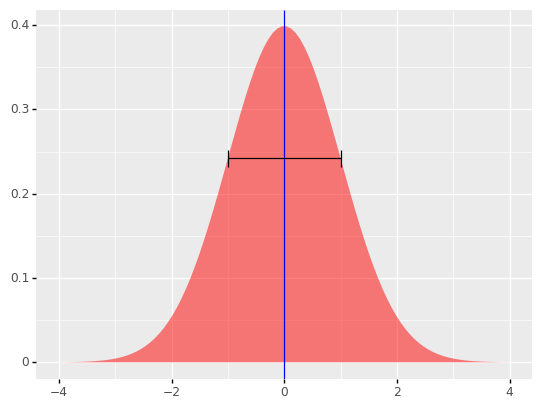

<ggplot: (400838250)>

In [2]:
p = ggplot(DataFrame({'x':np.linspace(-4, 4, 100)}).assign(density = lambda df: norm.pdf(df['x'])))
p = p + geom_area(aes(x = 'x', y = 'density'), position=position_identity, alpha = 0.5, fill = 'red')
p = p + geom_vline(xintercept = 0, color='blue')
p = p + geom_errorbarh(aes(y = 'y'), data = DataFrame({'y': [norm.pdf(1)]}), xmin=-1, xmax=1, height = 0.02)

p = p + scale_x_continuous(name='') + scale_y_continuous(name='')
display(p)

## II. Affine transformation of the standard normal distribution

Let us consider an affine transformation $y=\sigma x+ \mu$ where $x$ is drawn form $\mathcal{N}(0,1)$.
Then the inverse transformation is given by the formula.
\begin{align*}
x=\frac{y-\mu}{\sigma}\\
\end{align*}

In order to derive density function $p[y=y_0|y=\sigma x+ \mu, x\sim\mathcal{N}(0,1)]$ we need to compute the probability

\begin{align*}
\Pr[y\in [y_0-\Delta y, y_0+\Delta y]]
\end{align*}

for vanishingly small $\Delta y$. 
It is easy to see that when $y$ is in the interval $[y_0-\Delta y, y_0+\Delta y]$ the $x$ value must be inside the interval $[x_1, x_2]$ for the endpoints

\begin{align*}
x_1&=\frac{y_0-\Delta y-\mu}{\sigma}\\
x_2&=\frac{y_0+\Delta y-\mu}{\sigma}\\
\end{align*}

and thus

\begin{align*}
\Pr[y\in [y_0-\Delta y, y_0+\Delta y]]=\Pr[x\in [x_1, x_2]]\enspace.
\end{align*}


As we know how the density $p[x| x\sim\mathcal{N}(0,1)]$ is releated to $\Pr[x\in[x_0-\Delta x, x_0+\Delta]]$ we need to convert the interval $[x_1,x_2]$ into the right format. 
Clearly, the assignment

\begin{align*}
x_0&=\frac{x_1+x_2}{2}=\frac{y_0-\mu}{\sigma}\\
\Delta x &= \frac{x_2-x_1}{2}=\frac{\Delta y}{\sigma}
\end{align*}

gives a right parametrisation and consequently

\begin{align*}
\Pr[y\in [y_0-\Delta y, y_0+\Delta y]]
&\approx 2 \cdot p[x_0]\cdot \Delta x  \\
&\approx 2\cdot \frac{1}{\sqrt{2\pi}}\cdot\exp\left(-\frac{(y_0-\mu)^2}{2\sigma^2}\right)\cdot \frac{\Delta y}{\sigma}\\
&\approx \frac{1}{\sqrt{2\pi} \sigma}\cdot\exp\left(-\frac{(y_0-\mu)^2}{2\sigma^2}\right)\cdot 2 \Delta y\\
\end{align*}

By applying the definition of density we can conclude

\begin{align*}
p[y|\mu, \sigma]=\frac{1}{\sqrt{2\pi} \sigma}\cdot\exp\left(-\frac{(y_0-\mu)^2}{2\sigma^2}\right)\enspace.
\end{align*}

Note that by the properties of expectation, the mean and variance of the affine transformation are 
\begin{align*}
\mathbf{E}(y)&=\mathbf{E}(\sigma x + mu)=\mu\\
\mathbf{Var}(y)&=\mathrm{Var}(\sigma x + \mu) =\sigma^2
\end{align*}

and thus we can identify the univatiate normal distribution through mean and variance alone.
The visualisation blelow compares the density of the standard normal distribution $x\sim\mathcal{N}(0,1)$ with its affine translation $y=3x+2$.


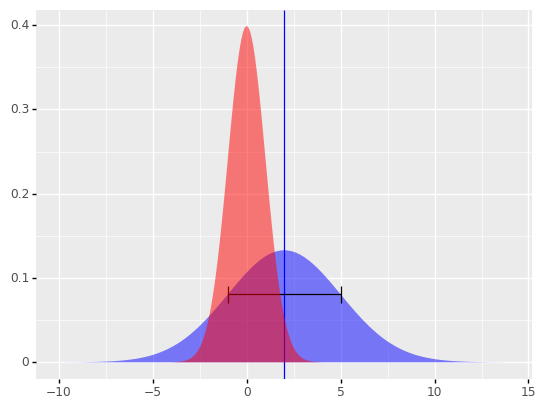

<ggplot: (400956248)>

In [3]:
p = ggplot(DataFrame({'x':np.linspace(-10, 14, 100)}).assign(density = lambda df: norm.pdf(df['x'], loc=2, scale=3)))
p = p + geom_area(aes(x = 'x', y = 'density'), position=position_identity, alpha = 0.5, fill = 'blue')
p = p + geom_vline(xintercept = 2, color='blue')
p = p + geom_errorbarh(aes(y = 'y'), data = DataFrame({'y': [norm.pdf(-1, loc=2, scale=3)]}), xmin=-1, xmax=5, height = 0.02)

p = p + geom_area(aes(x = 'x', y = 'density'), position=position_identity, alpha = 0.5, fill = 'red', data=DataFrame({'x':np.linspace(-4, 4, 100)}).assign(density = lambda df: norm.pdf(df['x'])))
p = p + scale_x_continuous(name='') + scale_y_continuous(name='')
display(p)